In [74]:
pip install phik

In [75]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# Импорт данных

In [76]:
df_order=pd.read_csv('orders.csv', delimiter=',')
df_products=pd.read_csv('products.csv', delimiter=',')
df_regions=pd.read_csv('regions.csv', delimiter=',')
df_stores=pd.read_csv('stores.csv', delimiter=',')

In [77]:
df_order.drop('date_create',axis=1,inplace=True)
df_order.drop('order_pickup',axis=1,inplace=True)
df_order.drop('Unnamed: 0',axis=1,inplace=True)

In [78]:
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F
...,...,...,...,...,...,...,...,...,...,...,...
19995,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F
19996,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F
19997,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F
19998,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F


In [79]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_id             20000 non-null  int64  
 1   order_id             20000 non-null  int64  
 2   product_id           20000 non-null  int64  
 3   price                20000 non-null  float64
 4   profit               17911 non-null  float64
 5   delivery_distance    20000 non-null  int64  
 6   order_start_prepare  18010 non-null  object 
 7   planned_prep_time    20000 non-null  float64
 8   order_ready          17999 non-null  object 
 9   region_id            20000 non-null  int64  
 10  status_id            20000 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.7+ MB


## Изменение типа

In [80]:
df_order['order_start_prepare'] = pd.to_datetime(df_order['order_start_prepare'])
df_order['order_ready'] = pd.to_datetime(df_order['order_ready'])

In [81]:
df_order.dtypes

,0
store_id,int64
order_id,int64
product_id,int64
price,float64
profit,float64
delivery_distance,int64
order_start_prepare,datetime64[ns]
planned_prep_time,float64
order_ready,datetime64[ns]
region_id,int64


##Вывод
Исходя из таблицы можно сделать вывод ,что есть небольшое количество пропусков в столбцах profit,order_ready,order_start_prepare.

In [82]:
df_order.isna().sum()

,0
store_id,0
order_id,0
product_id,0
price,0
profit,2089
delivery_distance,0
order_start_prepare,1990
planned_prep_time,0
order_ready,2001
region_id,0


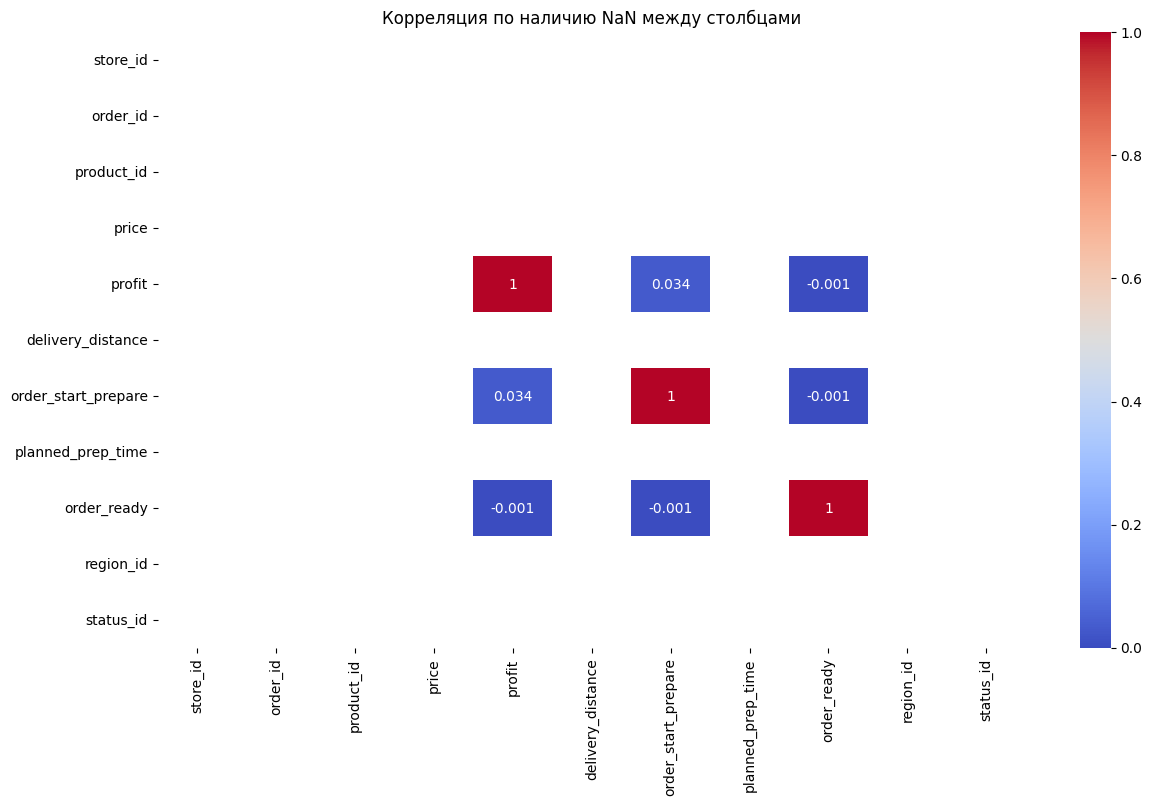

In [83]:
nan_indicators = df_order.isna().astype(int)

nan_corr = round(nan_indicators.corr(), 3)

plt.figure(figsize=(14, 8))
sns.heatmap(nan_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция по наличию NaN между столбцами')
plt.show()

## Вывод
Исходя из тепловой карты можно сказать что пропуски не коррелируют друг с другом.

#Графики

In [84]:
fig = px.histogram(df_order['store_id'])
fig.show()

In [85]:
fig = px.histogram(df_order['order_id'])
fig.show()

In [86]:
fig = px.histogram(df_order['product_id'])
fig.show()

<ipython-input-87-89c85c7a5f04>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




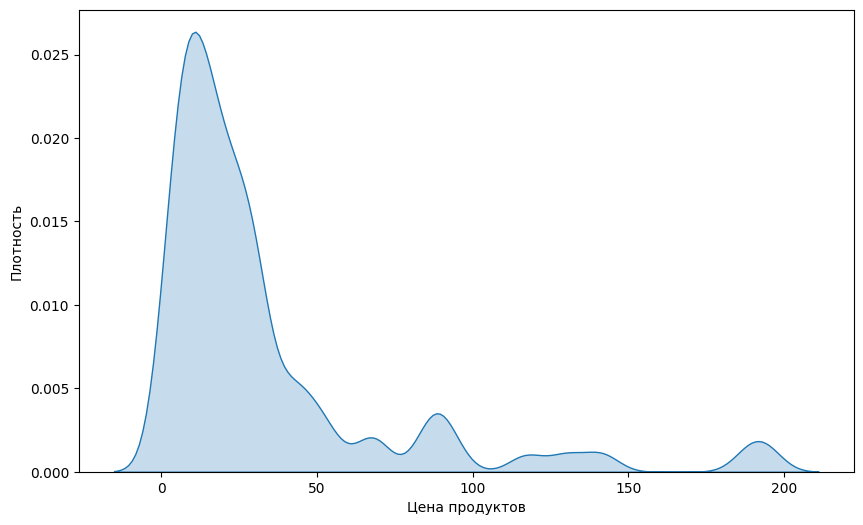

In [87]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_order.price, shade=True)  # shade=True закрашивает под кривой
plt.xlabel('Цена продуктов')
plt.ylabel('Плотность')
plt.show()

<ipython-input-88-c60e77d87b51>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




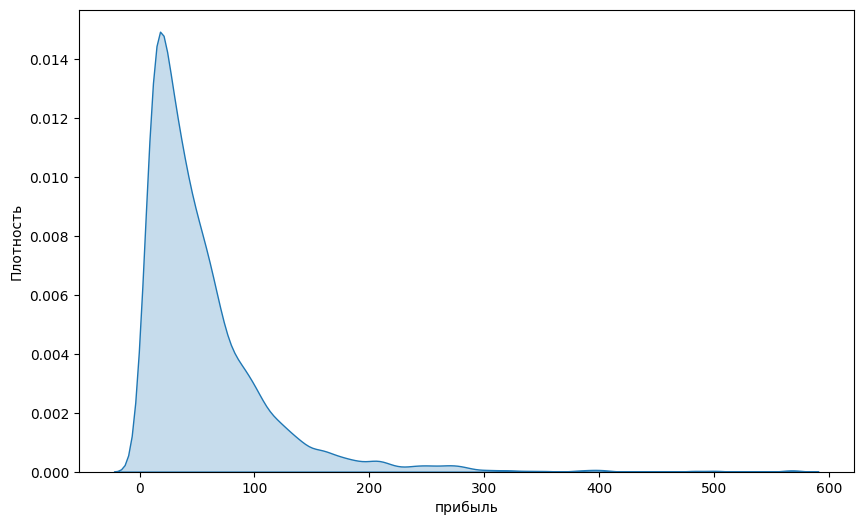

In [88]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_order.profit, shade=True)  # shade=True закрашивает под кривой
plt.xlabel('прибыль')
plt.ylabel('Плотность')
plt.show()

<ipython-input-89-d940bd1ec81e>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




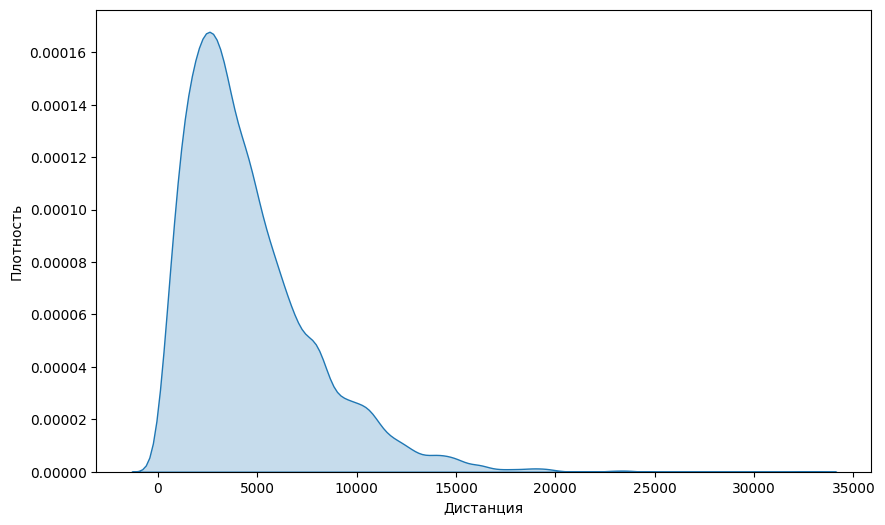

In [89]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_order.delivery_distance, shade=True)
plt.xlabel('Дистанция')
plt.ylabel('Плотность')
plt.show()

In [90]:
fig = px.histogram(df_order['order_start_prepare'])
fig.show()

<ipython-input-91-a96ba6276227>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




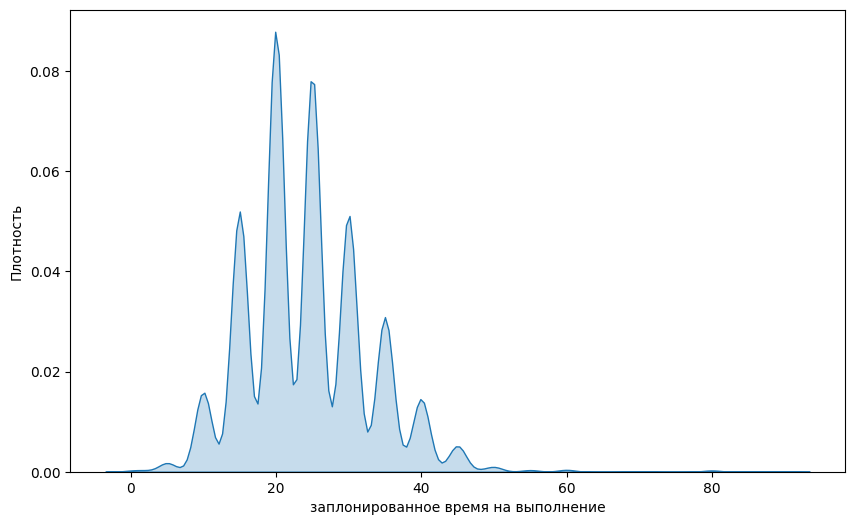

In [91]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_order.planned_prep_time, shade=True)
plt.xlabel('заплонированное время на выполнение')
plt.ylabel('Плотность')
plt.show()

In [92]:
fig = px.histogram(df_order['order_ready'])
fig.show()

In [93]:
fig = px.histogram(df_order['region_id'])
fig.show()

посмотрев дата сет можно увидеть что дата записана не коректно и забирают заказ ровно через 28 минут , по этому можно заполнить пропуски order_ready отняв от order_pickup 28 минут

# избавление от пропусков

сделал с помощью множественном заполнением потому что может возникнуть конфликт order_ready<order_start_prepare(не стал убеждатся что он есть но он возможен так как время идет в разброс)

In [94]:
df=df_order['order_ready']-df_order['order_start_prepare']
df.describe()

,0
count,16207
mean,0 days 00:22:01.084654778
std,0 days 00:11:12.253255629
min,-1 days +23:01:51
25%,0 days 00:14:20
50%,0 days 00:20:35
75%,0 days 00:28:26
max,0 days 01:20:08


In [95]:
condition = df_order['order_start_prepare'].isnull()
condition1 = df_order['order_ready'].isnull()
df_order = df_order[~(condition & condition1)]

In [96]:
df_order.loc[condition1, 'order_ready'] = df_order.loc[condition1, 'order_start_prepare'] + pd.Timedelta(seconds=1235)

In [97]:
df_order.loc[condition, 'order_start_prepare'] = df_order.loc[condition, 'order_ready'] - pd.Timedelta(seconds=1235)

In [98]:
condition=df_order['profit'].isnull()
df_order.loc[condition,'profit']=df_order.profit.median()

# Анализ на выбросы

в предыдущем пункте в первом блоке обнаружил что есть выбросы ,когда order_ready<order_start_prepare

In [99]:
condition=df_order['order_ready']<df_order['order_start_prepare']
df_order.loc[condition, 'order_start_prepare'] = df_order.loc[condition, 'order_ready'] - pd.Timedelta(seconds=1235)

In [100]:
fig = px.box(df_order, y = "profit")
fig.show()

In [101]:
condition=df_order['profit']>130.35
df_order[condition]
fig = px.box(df_order, y = "profit")
fig.show()

In [102]:
condition=df_order['profit']>130.35
df_order.loc[condition, 'profit']=130.35

изменил все значения выше 130.35 на максимальное так как profit может быть не просто так таким большим.

In [103]:
fig = px.box(df_order, y = "price")
fig.show()

In [104]:
for i in ['min','max']:
  df=df_order[['product_id','price']]
  df=df.groupby('product_id').agg({'price': i})
  print(df)

             price
product_id        
1           117.22
2            29.97
3            53.45
4           188.84
5           130.00
...            ...
67            3.93
68           31.91
69            8.11
70           21.16
71           41.64

[71 rows x 1 columns]
             price
product_id        
1           117.22
2            29.97
3            53.45
4           188.84
5           130.00
...            ...
67            3.93
68           31.91
69            8.11
70           21.16
71           41.64

[71 rows x 1 columns]


нет смысла фиксить выбросы в price так как продукты столько и стоят ,следовательно анамалий нет

In [105]:
fig = px.box(df_order, y = "delivery_distance")
fig.show()

In [106]:
condition=df_order['delivery_distance']>11845
df_order[condition]

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id
330,3503,20562077,30,87.30,15.958,14120,2024-09-05 14:30:59,20.0,2024-09-05 14:44:22,683,F
331,3503,20562077,4,188.84,15.958,14120,2024-09-05 14:30:59,20.0,2024-09-05 14:44:22,683,F
332,3503,20562077,26,4.69,15.958,14120,2024-09-05 14:30:59,20.0,2024-09-05 14:44:22,683,F
583,10825,20561765,53,12.05,38.710,11954,2024-09-05 14:09:37,30.0,2024-09-05 14:28:27,683,F
584,10825,20561765,38,66.85,38.710,11954,2024-09-05 14:09:37,30.0,2024-09-05 14:28:27,683,F
...,...,...,...,...,...,...,...,...,...,...,...
19889,3338,20535969,35,14.18,21.014,11949,2024-09-03 15:10:10,35.0,2024-09-03 15:40:15,683,F
19890,3338,20535969,1,117.22,21.014,11949,2024-09-03 15:10:10,35.0,2024-09-03 15:40:15,683,F
19891,3338,20535969,47,5.74,21.014,11949,2024-09-03 15:10:10,35.0,2024-09-03 15:40:15,683,F
19948,3206,20535881,63,8.91,34.365,17281,2024-09-03 15:04:46,20.0,2024-09-03 15:21:34,689,F


In [107]:
df_order = df_order[~(condition)]

решил их убрать так как их немного

In [108]:
fig = px.box(df_order, y = "planned_prep_time")
fig.show()


In [109]:
condition=df_order['planned_prep_time']>45
condition1=df_order['planned_prep_time']<5
df_order[condition | condition1]

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id
42,11513,20562523,53,12.05,5.4984,1905,2024-09-05 15:10:37,2.0,2024-09-05 15:12:04,691,F
43,11513,20562523,7,51.94,5.4984,1905,2024-09-05 15:10:37,2.0,2024-09-05 15:12:04,691,F
44,11513,20562523,70,21.16,5.4984,1905,2024-09-05 15:10:37,2.0,2024-09-05 15:12:04,691,F
45,11513,20562523,58,27.18,5.4984,1905,2024-09-05 15:10:37,2.0,2024-09-05 15:12:04,691,F
213,7331,20562243,39,13.64,43.8450,4338,2024-09-05 14:44:41,50.0,2024-09-05 15:39:30,695,F
...,...,...,...,...,...,...,...,...,...,...,...
18420,3693,20537763,34,2.77,38.7100,10939,2024-09-03 17:32:47,90.0,2024-09-03 18:39:05,685,F
18421,3693,20537763,49,4.00,38.7100,10939,2024-09-03 17:32:47,90.0,2024-09-03 18:39:05,685,F
18422,3693,20537763,7,51.94,38.7100,10939,2024-09-03 17:32:47,90.0,2024-09-03 18:39:05,685,F
19305,3344,20536641,36,23.48,130.3500,873,2024-09-03 16:05:19,80.0,2024-09-03 17:04:02,683,F


In [110]:
df_order=df_order[~(condition | condition1)]

выкинул их так как не понимаю от чего они зависят и их всего 100

# Создание новых колонок

## объединения DataFram

In [111]:
df_order = df_order.merge(df_stores[['store_id', 'store_name']], on='store_id', how='left')
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN


In [112]:
df_order = df_order.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
df=df_order[['order_id','product_id','product_name']]
gfg_csv_data = df.to_csv('product.csv', index = True)
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks


In [46]:
df_order = df_order.merge(df_regions[['region_id', 'delivery_region_name']], on='region_id', how='left')
df_order.rename(columns={'delivery_region_name': 'region_name'}, inplace=True)
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name,region_name
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry,Sovetsky District
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup,Sovetsky District
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad,Sovetsky District
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi,Sovetsky District
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad,Sovetsky District
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks,Sovetsky District


## items_count

In [47]:
df=df_order.groupby('order_id').agg({'product_id': 'count'}).rename(columns={'product_id': 'items_count'})
df_order = df_order.merge(df, on='order_id', how='left')
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name,region_name,items_count
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup,Sovetsky District,2
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad,Sovetsky District,2
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi,Sovetsky District,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad,Sovetsky District,5
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks,Sovetsky District,3


## order_price

In [48]:
df=df_order.groupby('order_id').agg({'price': 'sum'}).rename(columns={'price': 'order_price'})
df_order = df_order.merge(df, on='order_id', how='left')
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name,region_name,items_count,order_price
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2,30.49
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup,Sovetsky District,2,240.78
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad,Sovetsky District,2,240.78
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi,Sovetsky District,1,85.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad,Sovetsky District,5,102.11
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks,Sovetsky District,3,43.43


# Гистограмма

In [49]:
fig = px.histogram(df_order['product_name'])
fig.show()

## Ввывод
все продукты продаются +- одинаково.Меньше всего куриные крылышки 229 , больше всего злаки 300

# Разделение order_start_prepare

## Добавление дня недели

In [50]:
df_order['day_of_week'] = df_order['order_start_prepare'].dt.dayofweek
days_of_week = {
    0: 'Понедельник',
    1: 'Вторник',
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}
df_order['day_of_week'] = df_order['day_of_week'].replace(days_of_week)
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name,region_name,items_count,order_price,day_of_week
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49,Четверг
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2,30.49,Четверг
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup,Sovetsky District,2,240.78,Четверг
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad,Sovetsky District,2,240.78,Четверг
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi,Sovetsky District,1,85.99,Четверг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad,Sovetsky District,5,102.11,Вторник
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43,Вторник
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43,Вторник
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks,Sovetsky District,3,43.43,Вторник


## Создание столбца часы и минуты

In [51]:
df_order['hour_start'] = df_order['order_start_prepare'].dt.hour
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name,region_name,items_count,order_price,day_of_week,hour_start
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49,Четверг,15
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2,30.49,Четверг,15
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup,Sovetsky District,2,240.78,Четверг,15
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad,Sovetsky District,2,240.78,Четверг,15
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi,Sovetsky District,1,85.99,Четверг,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad,Sovetsky District,5,102.11,Вторник,15
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43,Вторник,15
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43,Вторник,15
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks,Sovetsky District,3,43.43,Вторник,15


In [52]:
df_order['minutes_start'] = df_order['order_start_prepare'].dt.minute
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,product_name,region_name,items_count,order_price,day_of_week,hour_start,minutes_start
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Nachos,Sovetsky District,2,30.49,Четверг,15,25
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,Curry,Sovetsky District,2,30.49,Четверг,15,25
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Soup,Sovetsky District,2,240.78,Четверг,15,25
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,Salad,Sovetsky District,2,240.78,Четверг,15,25
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,Sushi,Sovetsky District,1,85.99,Четверг,15,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,Fruit Salad,Sovetsky District,5,102.11,Вторник,15,2
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43,Вторник,15,3
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Steak,Sovetsky District,3,43.43,Вторник,15,3
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,Mozzarella Sticks,Sovetsky District,3,43.43,Вторник,15,3


# Анализ одной переменной

In [53]:
df_order.describe()

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,items_count,order_price,hour_start,minutes_start
count,18980.000000,1.898000e+04,18980.000000,18980.000000,18980.000000,18980.000000,18980,18980.000000,18980,18980.000000,18980.000000,18980.000000,18980.000000,18980.000000
mean,6695.769652,2.054895e+07,36.134141,33.757215,47.977918,4210.299947,2024-09-04 13:23:10.094309888,23.933298,2024-09-04 13:44:48.848577536,690.760063,3.436776,115.492068,15.166070,29.274447
min,3053.000000,2.053583e+07,1.000000,1.560000,0.979600,6.000000,2024-09-03 14:54:57,5.000000,2024-09-03 15:10:42,683.000000,1.000000,1.560000,0.000000,0.000000
25%,3962.000000,2.054200e+07,19.000000,9.560000,21.330000,2192.750000,2024-09-03 21:49:13,20.000000,2024-09-03 22:09:57,683.000000,2.000000,43.600000,12.000000,15.000000
50%,5923.000000,2.054893e+07,36.000000,21.030000,38.710000,3636.000000,2024-09-04 14:22:53,25.000000,2024-09-04 14:44:52,685.000000,3.000000,86.410000,16.000000,29.000000
75%,9319.000000,2.055534e+07,54.000000,31.910000,63.832000,5771.000000,2024-09-04 21:22:08,30.000000,2024-09-04 21:42:29,697.000000,4.000000,163.000000,19.000000,44.000000
max,11963.000000,2.056276e+07,71.000000,194.370000,130.350000,11845.000000,2024-09-05 15:25:33,45.000000,2024-09-05 15:38:38,717.000000,12.000000,764.270000,23.000000,59.000000
std,2835.622557,7.744826e+03,20.343658,40.277393,34.827166,2626.209028,NaN,7.877050,NaN,9.927519,1.843659,95.675542,5.288647,17.150379


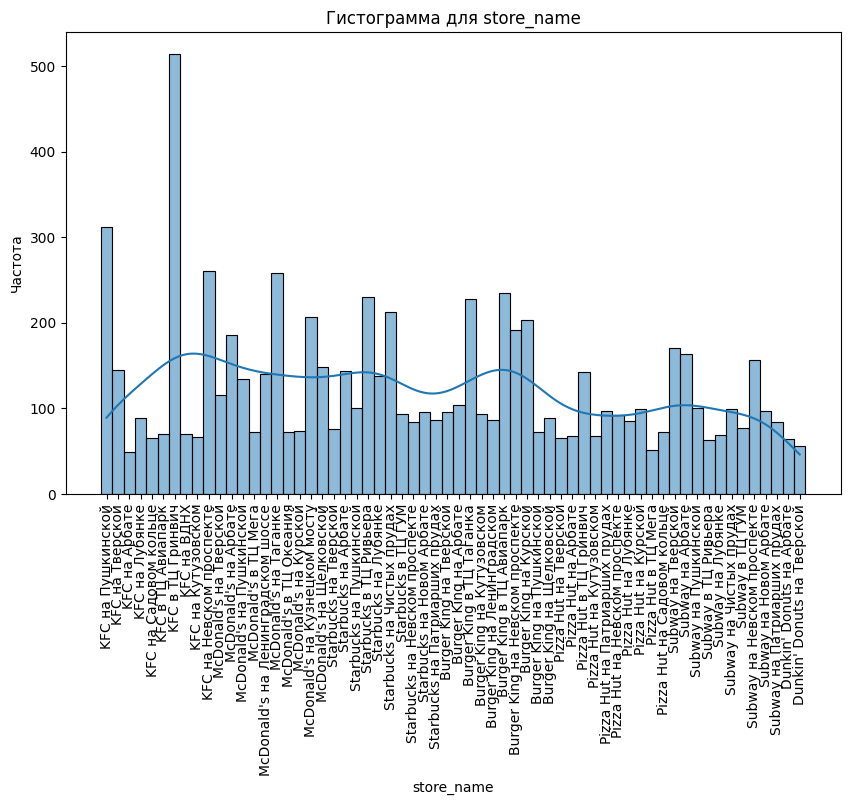

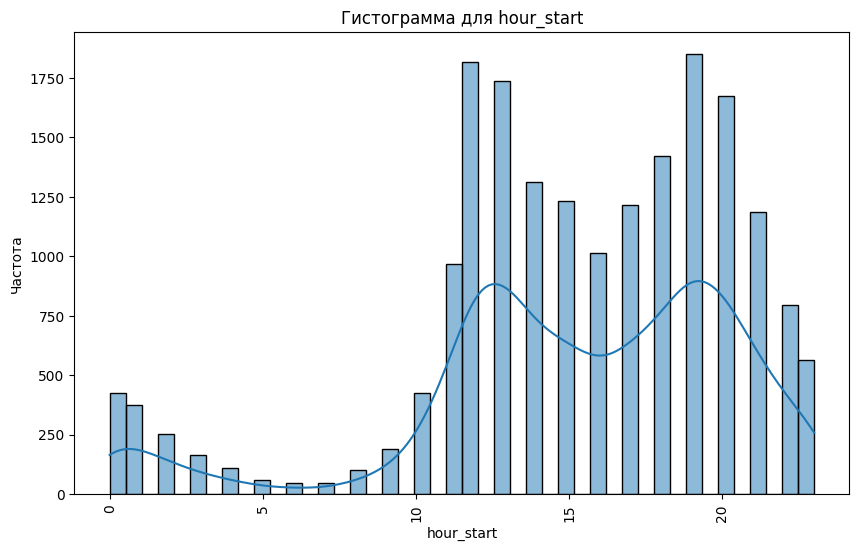

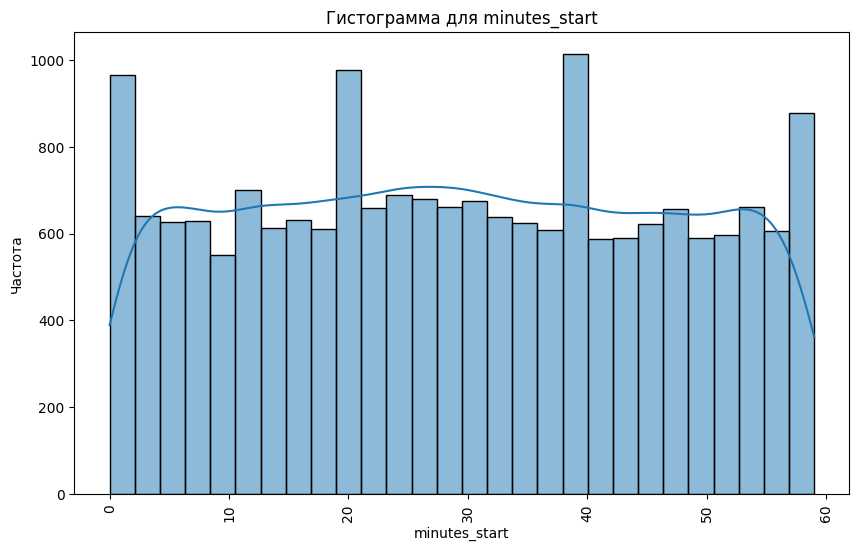

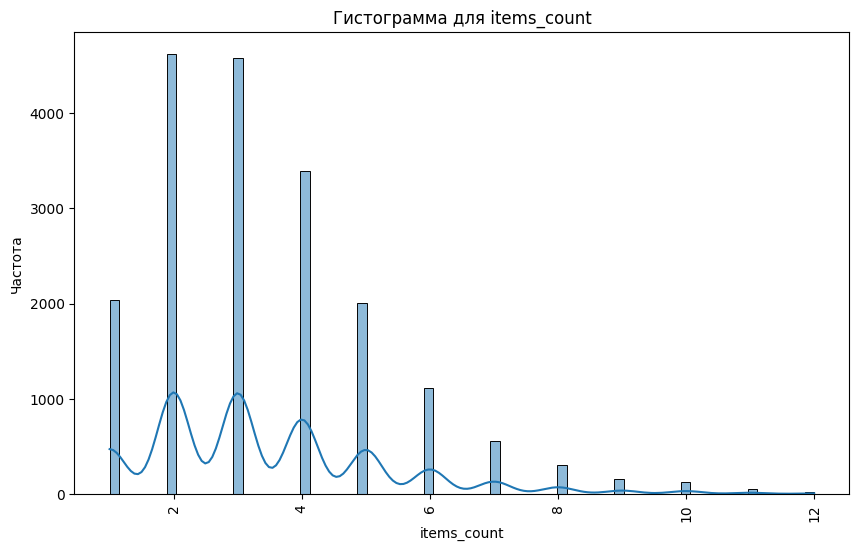

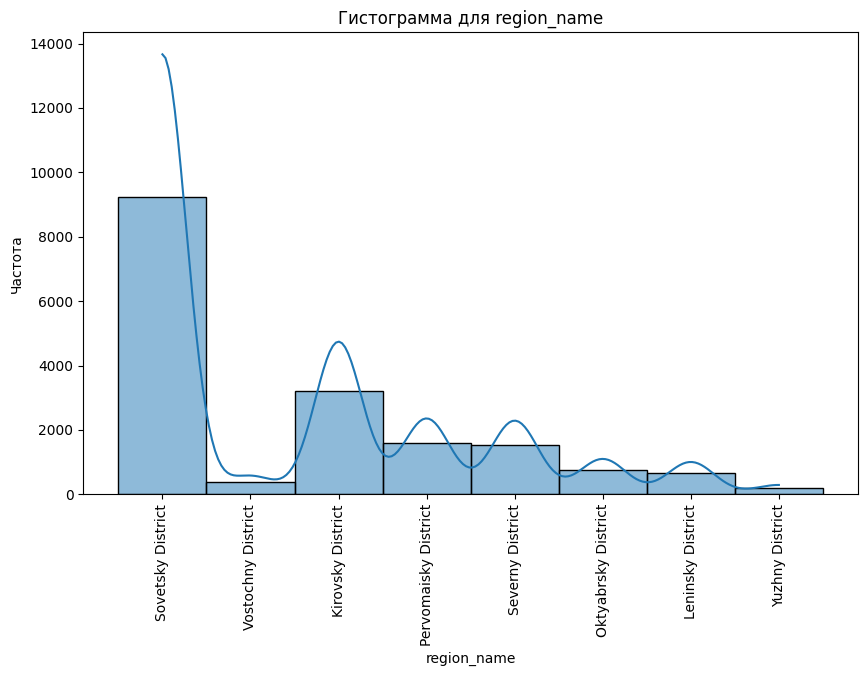

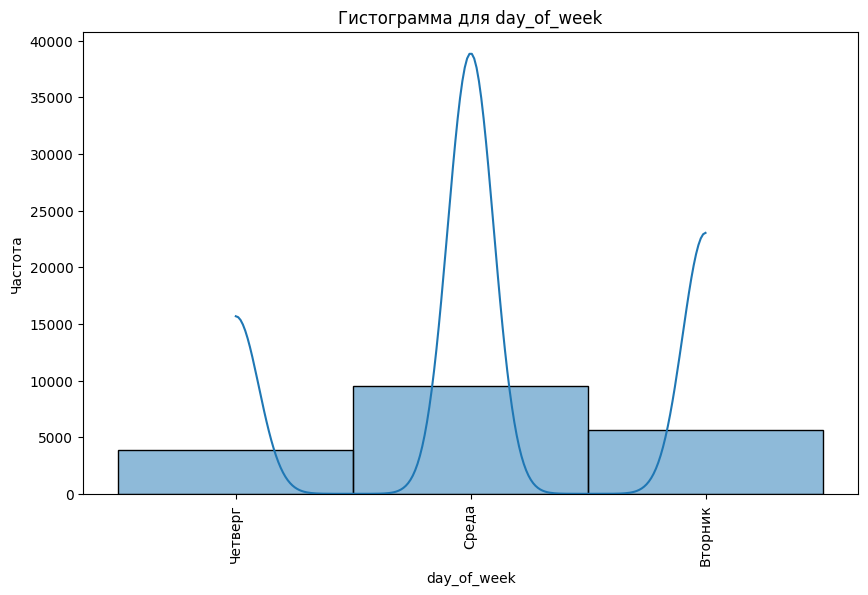

In [54]:
columns = ["store_name", "hour_start", "minutes_start", "items_count", "region_name", "day_of_week"]
for i in columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(data=df_order, x=i, kde=True)
  plt.title(f'Гистограмма для {i}')
  plt.xlabel(i)
  plt.ylabel('Частота')
  plt.xticks(rotation=90)
  plt.show()

<ipython-input-55-10a5fca0617c>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




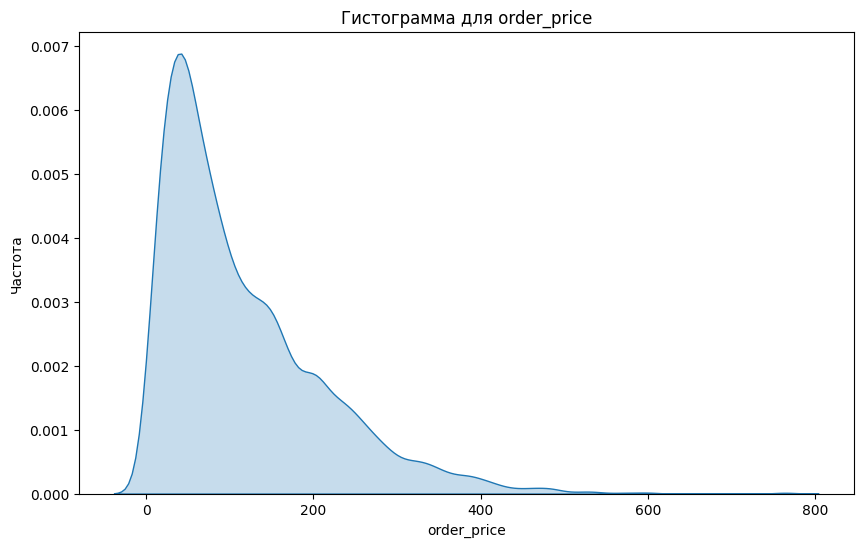

<ipython-input-55-10a5fca0617c>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




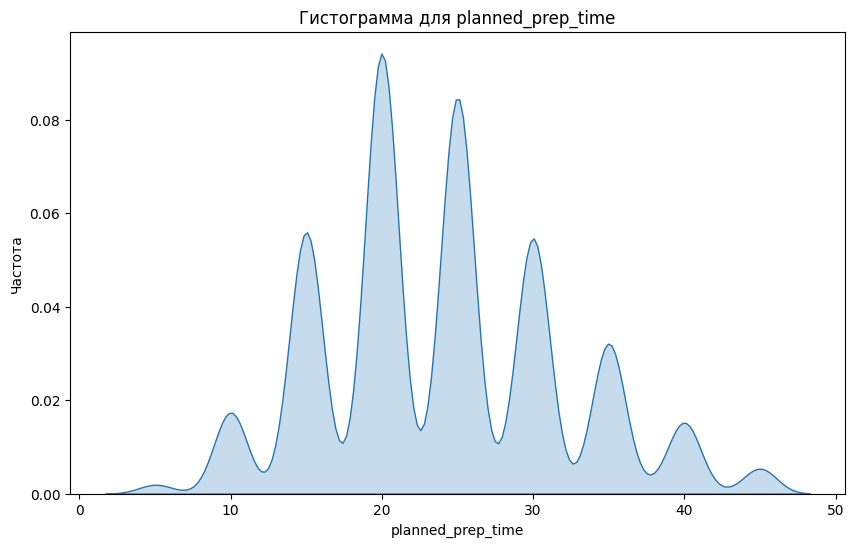

<ipython-input-55-10a5fca0617c>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




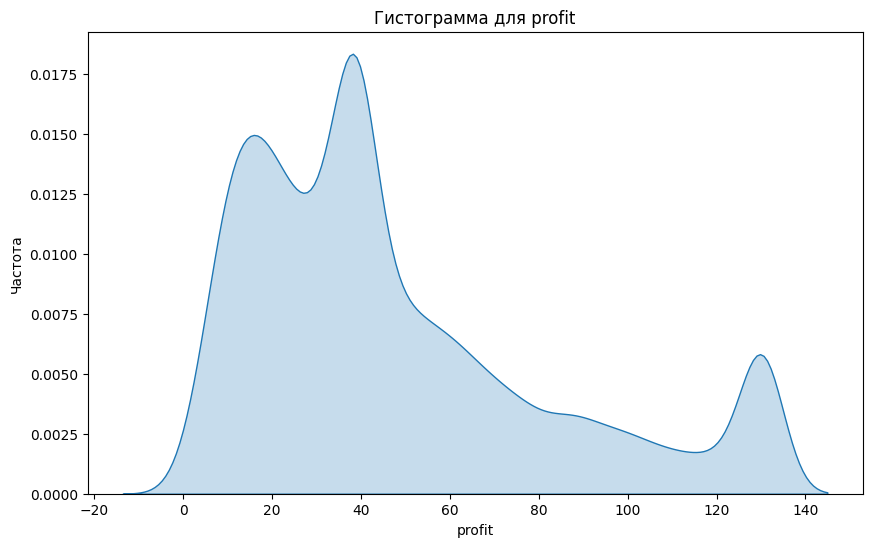

In [55]:
columns = ["order_price", "planned_prep_time", "profit"]
for i in columns:
  plt.figure(figsize=(10, 6))
  sns.kdeplot(df_order[i], shade=True)  # shade=True закрашивает под кривой
  plt.title(f'Гистограмма для {i}')
  plt.xlabel(i)
  plt.ylabel('Частота')
  plt.show()

## вывод
minutes_start,store_name относительно монотоные за исключением некоторых столбцов.видно что в day_of_week в среду люди делали заказы чаще.заказывали они в основном с 10-24, что видно по графику hour_start.В основном заказывают не много товаров ,это видно на графике Items_count.Самый популярный регион заказов Sovetsky District почти 10000 .order_price большая часть заказов по цене находится в рамках от 0-400.profit имеет 2 пика на 10 и 40 и небольшой в районе 135(потому что все значения выше были приравнены к нему).planned_prep_time имеет переодичные пики приблизительно каждые 5 минут

# циклические признаки

In [56]:
df_order['hour_start_sin'] = np.sin(2 * np.pi * df_order['hour_start']/24.0)
df_order['hour_start_cos'] = np.cos(2 * np.pi * df_order['hour_start']/24.0)

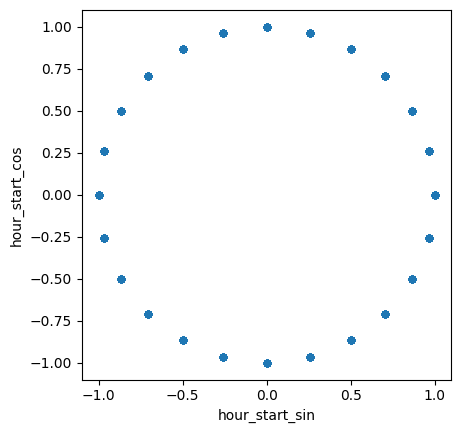

In [57]:
df_order.plot.scatter('hour_start_sin', 'hour_start_cos').set_aspect('equal')

In [58]:
df_order['minutes_start_sin'] = np.sin(2 * np.pi * df_order['minutes_start']/60.0)
df_order['minutes_start_cos'] = np.cos(2 * np.pi * df_order['minutes_start']/60.0)

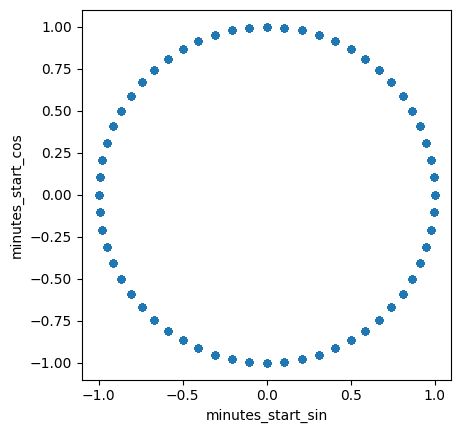

In [59]:
df_order.plot.scatter('minutes_start_sin', 'minutes_start_cos').set_aspect('equal')

# prepared_on_time

In [60]:
df=df_order['order_ready']-df_order['order_start_prepare']
planned_time= pd.to_timedelta(df_order['planned_prep_time'] + 5, unit='m')
df_order['prepared_on_time'] = (planned_time > df).astype(int)
df_order

,store_id,order_id,product_id,price,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,...,items_count,order_price,day_of_week,hour_start,minutes_start,hour_start_sin,hour_start_cos,minutes_start_sin,minutes_start_cos,prepared_on_time
0,5014,20562761,41,7.04,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,...,2,30.49,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
1,5014,20562761,31,23.45,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,...,2,30.49,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
2,3856,20562753,7,51.94,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,...,2,240.78,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
3,3856,20562753,4,188.84,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,...,2,240.78,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
4,10825,20562723,12,85.99,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,...,1,85.99,Четверг,15,23,-0.707107,-0.707107,0.669131,-0.743145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,6.17,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,...,5,102.11,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
18976,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1
18977,4348,20535835,8,17.26,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1
18978,4348,20535835,63,8.91,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1


# Баланс классов

In [61]:
df_order.value_counts()

store_id  order_id  product_id  price  profit    delivery_distance  order_start_prepare  planned_prep_time  order_ready          region_id  status_id  store_name                 product_name  region_name        items_count  order_price  day_of_week  hour_start  minutes_start  hour_start_sin  hour_start_cos  minutes_start_sin  minutes_start_cos  prepared_on_time
5377      20535951  33          8.27   86.7894   3806               2024-09-03 15:27:23  30.0               2024-09-03 16:06:34  683        F          Burger King на Щелковской  Dumplings     Sovetsky District  11           154.20       Вторник      15          27             -0.707107       -7.071068e-01    0.309017          -0.951057          0                   3
4757      20544115  39          13.64  17.0640   5551               2024-09-04 02:27:32  25.0               2024-09-04 02:47:07  707        F          Subway на Новом Арбате     Chili         Kirovsky District  6            88.19        Среда        2           27              0.500000        8.660254e-01    0.309017          -0.951057          1                   3
4723      20554265  58          27.18  50.2756   3109               2024-09-04 20:11:37  40.0               2024-09-04 20:51:51  707        F          Subway на Пушкинской       Cereal        Kirovsky District  11           246.27       Среда        20          11             -0.866025        5.000000e-01    0.913545           0.406737          1                   2
4757      20543839  2           29.97  16.6690   6353               2024-09-04 01:21:49  25.0               2024-09-04 01:40:16  707        F          Subway на Новом Арбате     Carrot        Kirovsky District  6            209.13       Среда        1           21              0.258819        9.659258e-01    0.809017          -0.587785          1                   2
11087     20561349  40          14.85  110.2050  8614               2024-09-05 14:02:14  25.0               2024-09-05 14:22:49  683        F          McDonald's на Арбате       Pasta Salad   Sovetsky District  5            80.37        Четверг      14          2              -0.500000       -8.660254e-01    0.207912           0.978148          1                   2
                                                                                                                                                                                                                                                                                                                                                                              ..
3816      20552075  53          12.05  77.8940   1442               2024-09-04 18:13:26  30.0               2024-09-04 18:41:37  683        F          Subway на Чистых прудах    Porridge      Sovetsky District  6            81.85        Среда        18          13             -1.000000       -1.836970e-16    0.978148           0.207912          1                   1
                    50          16.24  77.8940   1442               2024-09-04 18:13:26  30.0               2024-09-04 18:41:37  683        F          Subway на Чистых прудах    Cheesecake    Sovetsky District  6            81.85        Среда        18          13             -1.000000       -1.836970e-16    0.978148           0.207912          1                   1
                    42          4.85   77.8940   1442               2024-09-04 18:13:26  30.0               2024-09-04 18:41:37  683        F          Subway на Чистых прудах    Bagel         Sovetsky District  6            81.85        Среда        18          13             -1.000000       -1.836970e-16    0.978148           0.207912          1                   1
                    22          38.61  77.8940   1442               2024-09-04 18:13:26  30.0               2024-09-04 18:41:37  683        F          Subway на Чистых прудах    Shrimp        Sovetsky District  6            81.85        Среда        18          13             -1.000000       -1.836970e-16    0.978

классы достаточно сбалонсированные

# Корреляция

In [62]:
print(df_order.columns)

Index(['store_id', 'order_id', 'product_id', 'price', 'profit',
       'delivery_distance', 'order_start_prepare', 'planned_prep_time',
       'order_ready', 'region_id', 'status_id', 'store_name', 'product_name',
       'region_name', 'items_count', 'order_price', 'day_of_week',
       'hour_start', 'minutes_start', 'hour_start_sin', 'hour_start_cos',
       'minutes_start_sin', 'minutes_start_cos', 'prepared_on_time'],
      dtype='object')


In [63]:
corr = df_order[['price','profit', 'delivery_distance','planned_prep_time','items_count', 'order_price',
        'hour_start', 'minutes_start',
       'prepared_on_time']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price,profit,delivery_distance,planned_prep_time,items_count,order_price,hour_start,minutes_start,prepared_on_time
price,1.000000,0.011159,0.000473,0.006894,-0.007056,0.425047,-0.005699,-0.003603,-0.000112
profit,0.011159,1.000000,0.089229,0.299437,0.418743,0.289830,0.095567,0.006186,0.058552
delivery_distance,0.000473,0.089229,1.000000,0.033634,0.108385,0.073477,0.000022,0.007254,-0.062359
planned_prep_time,0.006894,0.299437,0.033634,1.000000,0.340191,0.229959,0.030650,0.003822,0.193030
items_count,-0.007056,0.418743,0.108385,0.340191,1.000000,0.612041,0.052046,-0.016846,0.028618
order_price,0.425047,0.289830,0.073477,0.229959,0.612041,1.000000,0.025126,-0.018080,0.016899
hour_start,-0.005699,0.095567,0.000022,0.030650,0.052046,0.025126,1.000000,-0.025303,0.033780
minutes_start,-0.003603,0.006186,0.007254,0.003822,-0.016846,-0.018080,-0.025303,1.000000,-0.010326
prepared_on_time,-0.000112,0.058552,-0.062359,0.193030,0.028618,0.016899,0.033780,-0.010326,1.000000


по матрицы можно сказать что planned_prep_time немного коррелирует с нашой целевой переменной

interval columns not set, guessing: ['price', 'profit', 'delivery_distance', 'planned_prep_time', 'items_count', 'order_price', 'hour_start', 'minutes_start', 'prepared_on_time']


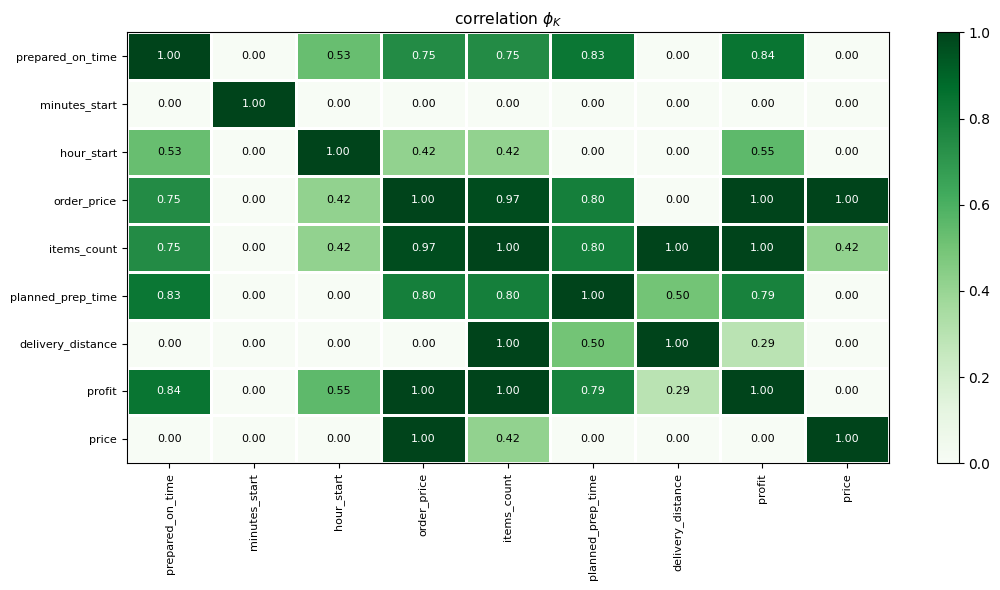

In [64]:
df_short = df_order[['price','profit', 'delivery_distance','planned_prep_time','items_count', 'order_price',
        'hour_start', 'minutes_start',
       'prepared_on_time']].corr()

phik_overview = df_short.phik_matrix()
plt=plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))

planned_prep_time ,items_count,order_price,hour_start,profit имеют достаточно хорошую нелинейную зависимость


interval columns not set, guessing: ['price', 'profit', 'delivery_distance', 'planned_prep_time', 'items_count', 'order_price', 'hour_start', 'minutes_start', 'prepared_on_time']


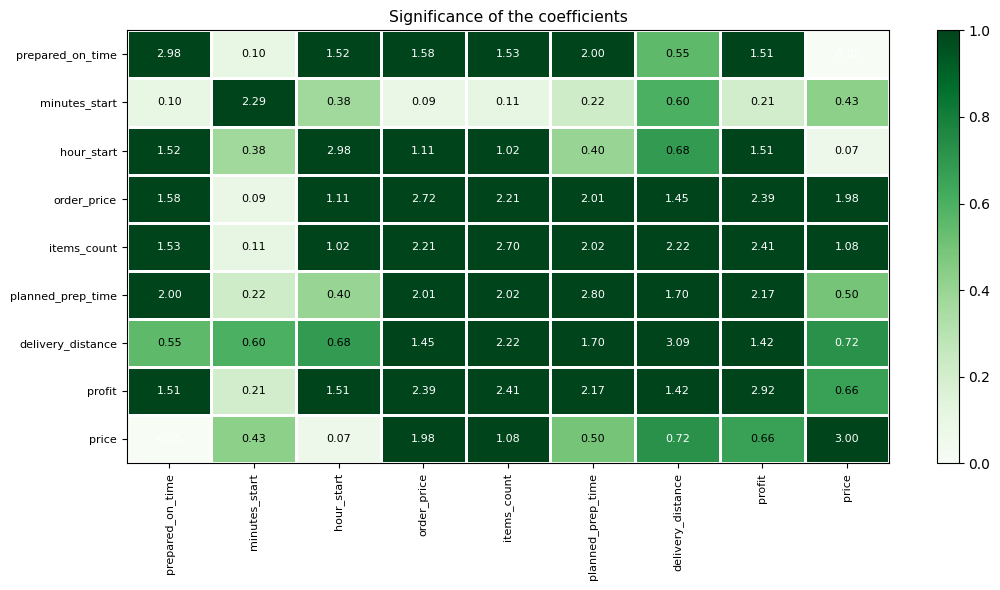

In [65]:
significance_overview = df_short.significance_matrix()

plot_correlation_matrix(significance_overview.values,
                        x_labels=significance_overview.columns,
                        y_labels=significance_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Significance of the coefficients",
                        usetex=False, fontsize_factor=0.8, figsize=(11, 6))

# Вывод
Классы достаточно сбалансированны.есть небольшая линейная зависимость от planned_prep_time, и достаточно большая нелинейная заввисимость от planned_prep_time ,items_count,order_price,profit и среднюю нелинейную зависимость от hour_start.

# удаление колонок

## удаление price

In [66]:
df_order.drop('price',axis=1,inplace=True)
df_order

,store_id,order_id,product_id,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,...,items_count,order_price,day_of_week,hour_start,minutes_start,hour_start_sin,hour_start_cos,minutes_start_sin,minutes_start_cos,prepared_on_time
0,5014,20562761,41,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,...,2,30.49,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
1,5014,20562761,31,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,...,2,30.49,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
2,3856,20562753,7,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,...,2,240.78,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
3,3856,20562753,4,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,...,2,240.78,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
4,10825,20562723,12,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,...,1,85.99,Четверг,15,23,-0.707107,-0.707107,0.669131,-0.743145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18975,7099,20535837,54,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,...,5,102.11,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
18976,4348,20535835,8,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1
18977,4348,20535835,8,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1
18978,4348,20535835,63,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1


## удаление дубликатов

In [67]:
df_order.drop('product_id',axis=1,inplace=True)
df_order.drop('product_name',axis=1,inplace=True)


In [68]:
df_order[df_order.duplicated()]

,store_id,order_id,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,...,items_count,order_price,day_of_week,hour_start,minutes_start,hour_start_sin,hour_start_cos,minutes_start_sin,minutes_start_cos,prepared_on_time
1,5014,20562761,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,...,2,30.49,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
3,3856,20562753,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,...,2,240.78,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
6,5640,20562673,32.8640,2611,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,709,F,NaN,...,2,24.68,Четверг,15,19,-0.707107,-0.707107,0.913545,-0.406737,1
9,8535,20562639,11.3128,1749,2024-09-05 15:16:52,10.0,2024-09-05 15:20:15,685,F,NaN,...,5,80.09,Четверг,15,16,-0.707107,-0.707107,0.994522,-0.104528,1
10,8535,20562639,11.3128,1749,2024-09-05 15:16:52,10.0,2024-09-05 15:20:15,685,F,NaN,...,5,80.09,Четверг,15,16,-0.707107,-0.707107,0.994522,-0.104528,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18973,7099,20535837,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,...,5,102.11,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
18974,7099,20535837,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,...,5,102.11,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
18975,7099,20535837,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,...,5,102.11,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
18977,4348,20535835,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1


In [69]:
df_order = df_order.drop_duplicates().reset_index(drop=True)

In [70]:
df_order

,store_id,order_id,profit,delivery_distance,order_start_prepare,planned_prep_time,order_ready,region_id,status_id,store_name,...,items_count,order_price,day_of_week,hour_start,minutes_start,hour_start_sin,hour_start_cos,minutes_start_sin,minutes_start_cos,prepared_on_time
0,5014,20562761,45.5040,2205,2024-09-05 15:25:33,15.0,2024-09-05 15:32:00,683,F,KFC на Пушкинской,...,2,30.49,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
1,3856,20562753,30.3360,1368,2024-09-05 15:25:19,10.0,2024-09-05 15:35:50,683,F,NaN,...,2,240.78,Четверг,15,25,-0.707107,-0.707107,0.500000,-0.866025,1
2,10825,20562723,43.6080,459,2024-09-05 15:23:44,20.0,2024-09-05 15:38:38,683,F,NaN,...,1,85.99,Четверг,15,23,-0.707107,-0.707107,0.669131,-0.743145,1
3,5640,20562673,32.8640,2611,2024-09-05 15:19:05,20.0,2024-09-05 15:35:25,709,F,NaN,...,2,24.68,Четверг,15,19,-0.707107,-0.707107,0.913545,-0.406737,1
4,7283,20562665,11.0600,1041,2024-09-05 15:14:58,15.0,2024-09-05 15:35:33,707,F,NaN,...,1,14.02,Четверг,15,14,-0.707107,-0.707107,0.994522,0.104528,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,7557,20535845,50.1650,8046,2024-09-03 15:03:01,35.0,2024-09-03 15:27:37,683,F,NaN,...,5,277.28,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1
7463,4548,20535841,14.6150,2225,2024-09-03 15:02:04,20.0,2024-09-03 15:17:18,707,F,NaN,...,2,21.05,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
7464,7099,20535837,12.1976,3354,2024-09-03 15:02:27,25.0,2024-09-03 15:27:40,683,F,NaN,...,5,102.11,Вторник,15,2,-0.707107,-0.707107,0.207912,0.978148,1
7465,4348,20535835,49.2960,2129,2024-09-03 15:03:49,30.0,2024-09-03 15:20:34,683,F,NaN,...,3,43.43,Вторник,15,3,-0.707107,-0.707107,0.309017,0.951057,1


In [72]:
gfg_csv_data = df_order.to_csv('data.csv', index = True)